In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#load data frame
df = pd.read_csv('profiles.csv')

In [3]:
#exploring data

#df.head()
#df.offspring.value_counts()
#df.age.value_counts()

In [4]:
features_to_remove = ['body_type','diet','education','ethnicity','height', 'status', 'location','sign','pets','religion','speaks', 'last_online', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
df.drop(labels=features_to_remove, axis=1, inplace=True)

In [5]:
#finds which features have nans
#df.isna().any()


In [6]:
#replaces nans with '0'
df.fillna({'drugs': 0,
          'job': 0,
          'offspring': 0,
          'smokes': 0,
           'drinks': 0,
          'income': 0},
          inplace=True)

In [7]:
#map categorical data interested in

orientation_map = {
                   'straight': 1,
                   'gay': 2,
                   'bisexual': 3}
sex_map = {
           'm': 1,
           'f': 2}
smokes_map = { 
              'no': 1,
              'sometimes': 2, 
              'when drinking': 3,
              'yes': 4,
              'trying to quit': 5}
drugs_map = {
             'never': 1, 
             'sometimes': 2, 
             'often': 3}
drinks_map = {
             'not at all': 1,
             'rarely': 2, 
             'socially': 3,
             'often': 4, 
             'very often': 5, 
             'desperately': 6}
job_map = {
           'other': 1,
           'student': 2,
           'science / tech / engineering': 3,
           'computer / hardware / software': 4,
           'artistic / musical / writer': 5,
           'sales / marketing / biz dev': 6,
           'medicine / health': 7,
           'education / academia': 8,
           'executive / management': 9,
           'banking / financial / real estate': 10,
           'entertainment / media': 11,
           'law / legal services': 12,
           'hospitality / travel': 13,
           'construction / craftsmanship': 14,
          'clerical / administrative': 15, 
          'political / government': 16,
          'rather not say': 17,
          'transportation': 18,
          'unemployed': 19,
          'retired': 20,
          'military': 21}



df['sex_code'] = df.sex.map(sex_map)
df['orientation_code'] = df.orientation.map(orientation_map)
df['smokes_code'] = df.smokes.map(smokes_map)
df['drinks_code'] = df.drinks.map(drinks_map)
df['drugs_code'] = df.drugs.map(drugs_map)
df['job_code'] = df.job.map(job_map)

In [8]:
#create labels to predict
df.loc[df['offspring'] == 'doesn&rsquo;t have kids, but wants them', 'offspring_label'] = 1
df.loc[df['offspring'] == 'wants kids', 'offspring_label'] = 1
df.loc[df['offspring'] == 'has a kid, and wants more', 'offspring_label'] = 1
df.loc[df['offspring'] == 'has kids, and wants more', 'offspring_label'] = 1


df.loc[df['offspring'] == 'doesn&rsquo;t want kids', 'offspring_label'] = 0
df.loc[df['offspring'] == 'doesn&rsquo;t have kids, and doesn&rsquo;t want any', 'offspring_label'] = 0
df.loc[df['offspring'] == 'has kids, but doesn&rsquo;t want more', 'offspring_label'] = 0
df.loc[df['offspring'] == 'has a kid, but doesn&rsquo;t want more', 'offspring_label'] = 0


In [9]:
#df.isna().any()

In [10]:
df.dropna(axis = 0, subset = ['offspring_label'], inplace = True) 
df.dropna(axis = 0, subset = ['smokes_code', 'drinks_code', 'drugs_code', 'job_code'], inplace = True)


In [11]:
from sklearn.preprocessing import scale
#normalize data

labels = df['offspring_label']
data = data = df[['sex_code', 'orientation_code', 'smokes_code', 'drinks_code', 'drugs_code', 'age', 'job_code', 'income']]
scaled_data = scale(data, axis = 0)


In [12]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

In [13]:
#for runtime results

#from sklearn.neighbors import KNeighborsClassifier

#classifier = KNeighborsClassifier(n_neighbors = 42)
#classifier.fit(train_data, train_labels)
#%timeit classifier.score(test_data, test_labels)
#%timeit classifier.predict(test_data)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy = []
recall = []
precision = []
f1 = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    predicted = classifier.predict(test_data)
    accuracy.append(accuracy_score(test_labels, predicted))
    recall.append(recall_score(test_labels, predicted))
    precision.append(precision_score(test_labels, predicted))
    f1.append(f1_score(test_labels, predicted))
    k_values = range(1,200)
    k_accuracy = list(zip(k_values, accuracy))
    k_recall = list(zip(k_values, recall))
    k_precision = list(zip(k_values, precision))
    k_f1 = list(zip(k_values, f1))
    best_accuracy = sorted(k_accuracy, key=lambda tup: tup[1], reverse = True)
    best_recall = sorted(k_recall, key=lambda tup: tup[1], reverse = True)
    best_precision = sorted(k_precision, key=lambda tup: tup[1], reverse = True)
    best_f1 = sorted(k_f1, key=lambda tup: tup[1], reverse = True)
print('Best Accuracy (k, score):', best_accuracy[0])
print('Best Recall (k, score):', best_recall[0])
print('Best Precision (k, score):', best_precision[0])
print('Best F1 (k, score):', best_f1[0])



Best Accuracy (k, score): (42, 0.7621998450813323)
Best Recall (k, score): (171, 0.825)
Best Precision (k, score): (22, 0.7102177554438861)
Best F1 (k, score): (63, 0.7434210526315789)


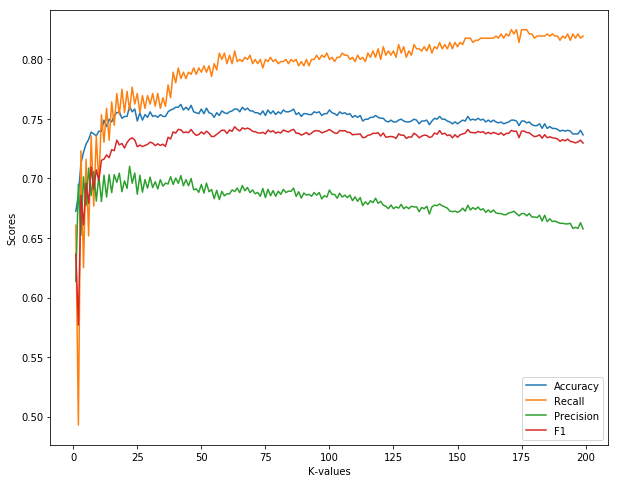

In [15]:
plt.figure(figsize = (10,8))    
plt.plot(range(1,200), accuracy)
plt.plot(range(1,200), recall)
plt.plot(range(1,200), precision)
plt.plot(range(1,200), f1)
plt.xlabel('K-values')
plt.ylabel('Scores')
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1'], loc='lower right')
plt.show()


